In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)

Check classes from data

In [2]:
_csv_path_train = "/home/a52550/Desktop/datasets/ISIC2017/train/ISIC-2017_Training_Part3_GroundTruth.csv"
_csv_path_train_original = "/home/a52550/Desktop/datasets/ISIC2017/train/ISIC-2017_Training_Part3_GroundTruth_original.csv"
_csv_path_validation = "/home/a52550/Desktop/datasets/ISIC2017/validation/ISIC-2017_Validation_Part3_GroundTruth.csv"
_csv_path_validation_original = "/home/a52550/Desktop/datasets/ISIC2017/validation/ISIC-2017_Validation_Part3_GroundTruth_original.csv"
_csv_path_test = "/home/a52550/Desktop/datasets/ISIC2017/test/ISIC-2017_Test_v2_Part3_GroundTruth.csv"
_csv_path_test_original = "/home/a52550/Desktop/datasets/ISIC2017/test/ISIC-2017_Test_v2_Part3_GroundTruth_original.csv"

In [3]:
train_data = pd.read_csv(_csv_path_train)
train_data_original = pd.read_csv(_csv_path_train_original)
validation_data = pd.read_csv(_csv_path_validation)
validation_data_original = pd.read_csv(_csv_path_validation_original)
test_data = pd.read_csv(_csv_path_test)
test_data_original = pd.read_csv(_csv_path_test_original)
test_data_original.head()

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0012086,0.0,1.0
1,ISIC_0012092,0.0,0.0
2,ISIC_0012095,0.0,0.0
3,ISIC_0012134,0.0,1.0
4,ISIC_0012136,0.0,1.0


In [4]:
print("Train original:")
print(train_data_original[train_data_original['melanoma'] == 1].shape)
print(train_data_original[train_data_original['seborrheic_keratosis'] == 1].shape)
print(train_data_original[(train_data_original['melanoma'] == 0) & (train_data_original['seborrheic_keratosis'] == 0)].shape)
print("Train after:")
print(train_data[train_data['category'] == 1].shape) # melanoma
print(train_data[train_data['category'] == 2].shape) # seborrheic_keratosis
print(train_data[train_data['category'] == 0].shape) # nevi

print("validation original:")
print(validation_data_original[validation_data_original['melanoma'] == 1].shape)
print(validation_data_original[validation_data_original['seborrheic_keratosis'] == 1].shape)
print(validation_data_original[(validation_data_original['melanoma'] == 0) & (validation_data_original['seborrheic_keratosis'] == 0)].shape)
print("validation after:")
print(validation_data[validation_data['category'] == 1].shape) # melanoma
print(validation_data[validation_data['category'] == 2].shape) # seborrheic_keratosis
print(validation_data[validation_data['category'] == 0].shape) # nevi

print("test original:")
print(test_data_original[test_data_original['melanoma'] == 1].shape)
print(test_data_original[test_data_original['seborrheic_keratosis'] == 1].shape)
print(test_data_original[(test_data_original['melanoma'] == 0) & (test_data_original['seborrheic_keratosis'] == 0)].shape)
print("test after:")
print(test_data[test_data['category'] == 1].shape) # melanoma
print(test_data[test_data['category'] == 2].shape) # seborrheic_keratosis
print(test_data[test_data['category'] == 0].shape) # nevi
# validation_data.head()
# test_data.head()

Train original:
(374, 3)
(254, 3)
(1372, 3)
Train after:
(374, 2)
(254, 2)
(1372, 2)
validation original:
(30, 3)
(42, 3)
(78, 3)
validation after:
(30, 2)
(42, 2)
(78, 2)
test original:
(117, 3)
(90, 3)
(393, 3)
test after:
(117, 2)
(90, 2)
(393, 2)


In [18]:
df = pd.read_csv('results/all_metrics_noDA_noPP.csv')
df = df.append(pd.read_csv('results/all_metrics_noDA_noPP_2.csv'))
# df2 = pd.read_csv('results/all_metrics_noDA_noPP_2.csv')
len(df)

1323

In [40]:
# df2 = df.groupby(['model_name'], as_index=False)
# count = 0

df_best_results = pd.DataFrame()

# for model_name, group in df2:
#     df_aux = df_aux.append(group.sort_values(by='loss', ascending=True).head(3), ignore_index=True)
#     df_aux = df_aux.append(group.sort_values(by='accuracy', ascending=False).head(3), ignore_index=True)
#     df_aux = df_aux.append(group.sort_values(by='balanced_accuracy', ascending=False).head(3), ignore_index=True)
#     df_aux = df_aux.append(group.sort_values(by='balanced_accuracy', ascending=False).head(3), ignore_index=True)
#     count += 1

# print(len(df_aux))
# df_aux = df_aux.drop_duplicates()
# print(len(df_aux))

df_aux = df
df_aux = df_aux[(df_aux['partition'] != 'validation') & ((df_aux['optimizer'] == 'SGD') | (df_aux['optimizer'] == 'Adam') | (df_aux['optimizer'] == 'AdamW'))]

In [41]:
columns = ['folder', 'model_name', 'optimizer', 'batch_size', 'lr_init', 'partition', 'data_augmentation', 'PP_enhancement', 'PP_hair_removal', 'PP_color_constancy', 'PP_denoising', 'PP_crop_mode',  'balanced_accuracy']

df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b0') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b0') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# AdamW 32 0.001
df_best_results[(df_best_results['model_name'] == 'efficientnet_b0')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
490,results/efficientnet_b0_fold-1_lrinit-0.001_ba...,efficientnet_b0,AdamW,8,0.001,test,False,NaN,NaN,NaN,NaN,NaN,0.707405


In [42]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b1')  & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b1')  & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# AdamW 32 0.001
df_best_results[(df_best_results['model_name'] == 'efficientnet_b1')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
526,results/efficientnet_b1_fold-1_lrinit-0.001_ba...,efficientnet_b1,AdamW,8,0.001,test,False,NaN,NaN,NaN,NaN,NaN,0.711764


In [43]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b2') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b2') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# AdamW 32 0.001
df_best_results[(df_best_results['model_name'] == 'efficientnet_b2')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
553,results/efficientnet_b2_fold-1_lrinit-0.001_ba...,efficientnet_b2,Adam,8,0.001,test,False,NaN,NaN,NaN,NaN,NaN,0.705728


In [44]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b3') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b3') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# Adam 32 0.001
df_best_results[(df_best_results['model_name'] == 'efficientnet_b3')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
239,results/efficientnet_b3_fold-1_lrinit-0.001_ba...,efficientnet_b3,Adam,32,0.001,test,NaN,NaN,NaN,NaN,NaN,NaN,0.721281


In [45]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b4') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b4') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# Adam 25 0.001
df_best_results[(df_best_results['model_name'] == 'efficientnet_b4')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
715,results/efficientnet_b4_fold-1_lrinit-0.001_ba...,efficientnet_b4,AdamW,16,0.001,test,False,NaN,NaN,NaN,NaN,NaN,0.705591


In [46]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b5') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b5') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# Adam 4 0.001
df_best_results[(df_best_results['model_name'] == 'efficientnet_b5')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
721,results/efficientnet_b5_fold-1_lrinit-0.001_ba...,efficientnet_b5,Adam,8,0.001,test,False,NaN,NaN,NaN,NaN,NaN,0.535576


In [47]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'tf_efficientnet_b5') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b5') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# Adam 4 0.001
df_best_results[(df_best_results['model_name'] == 'tf_efficientnet_b5')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
34,results/tf_efficientnet_b5_fold-1_lrinit-0.000...,tf_efficientnet_b5,AdamW,8,0.0001,test,NaN,NaN,NaN,NaN,NaN,NaN,0.700872


In [48]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b6') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b6') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# SGD 4 0.001
df_best_results[(df_best_results['model_name'] == 'efficientnet_b6')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
296,results/efficientnet_b6_fold-1_lrinit-0.001_ba...,efficientnet_b6,SGD,4,0.001,test,NaN,NaN,NaN,NaN,NaN,NaN,0.52306


In [49]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'tf_efficientnet_b6') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b6') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# SGD 4 0.001
df_best_results[(df_best_results['model_name'] == 'tf_efficientnet_b6')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
52,results/tf_efficientnet_b6_fold-1_lrinit-0.000...,tf_efficientnet_b6,AdamW,4,0.0001,test,NaN,NaN,NaN,NaN,NaN,NaN,0.744253


In [50]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'resnest101e') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'resnest101e') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# AdamW 32 0.0001
df_best_results[(df_best_results['model_name'] == 'resnest101e')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
1129,results/resnest101e_fold-1_lrinit-0.0001_batch...,resnest101e,AdamW,8,0.0001,test,False,NaN,NaN,NaN,NaN,NaN,0.731415


In [51]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'seresnext101_32x8d') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'seresnext101_32x8d') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# NovoGrad 4 0.001
df_best_results[(df_best_results['model_name'] == 'seresnext101_32x8d')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
1096,results/seresnext101_32x8d_fold-1_lrinit-0.000...,seresnext101_32x8d,Adam,32,0.0001,test,False,NaN,NaN,NaN,NaN,NaN,0.716522


In [52]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'vgg19') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'vgg19') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# SGD 32 0.001
df_best_results[(df_best_results['model_name'] == 'vgg19')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
730,results/vgg19_fold-1_lrinit-0.001_batchsize-8_...,vgg19,SGD,8,0.001,test,False,NaN,NaN,NaN,NaN,NaN,0.671949


In [53]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'senet154') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'senet154') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# Adam 4 0.001
df_best_results[(df_best_results['model_name'] == 'senet154')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
814,results/senet154_fold-1_lrinit-0.001_batchsize...,senet154,SGD,8,0.001,test,False,NaN,NaN,NaN,NaN,NaN,0.573117


In [54]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'densenet121') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'densenet121') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# Adam 4 0.001
df_best_results[(df_best_results['model_name'] == 'densenet121')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
106,results/densenet121_fold-1_lrinit-0.0001_batch...,densenet121,Adam,32,0.0001,test,NaN,NaN,NaN,NaN,NaN,NaN,0.721235


In [55]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'resnext101_32x8d') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'resnext101_32x8d') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# Adam	32	0.0001
df_best_results[(df_best_results['model_name'] == 'resnext101_32x8d')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
649,results/resnext101_32x8d_fold-1_lrinit-0.001_b...,resnext101_32x8d,SGD,8,0.001,test,False,NaN,NaN,NaN,NaN,NaN,0.728325


In [56]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'pnasnet5large') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'pnasnet5large') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# NovoGrad	4	0.001
df_best_results[(df_best_results['model_name'] == 'pnasnet5large')][columns]

,folder,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
1144,results/pnasnet5large_fold-1_lrinit-0.0001_bat...,pnasnet5large,Adam,8,0.0001,test,False,NaN,NaN,NaN,NaN,NaN,0.717268


In [57]:
# df_best_results.drop_duplicates().to_csv('best_results_noDA_noPP_2.csv', index=False)

In [21]:
df_model_name = pd.DataFrame({'model_name': ["resnext101_32x8d", "efficientnet_b0", "efficientnet_b1", "efficientnet_b2", "efficientnet_b3", "efficientnet_b4", "tf_efficientnet_b5", "tf_efficientnet_b6", "vgg19", "seresnext101_32x8d", "resnest101e", "pnasnet5large", "densenet121"]})
df_optimizer = pd.DataFrame({'optimizer': ["SGD", "Adam", "AdamW"]})
df_batch_size = pd.DataFrame({'batch_size': [4, 8, 16, 32, 64]})
df_lr_init = pd.DataFrame({'lr_init': [0.001, 0.0001]})

df_model_name['merge_column'] = 1
df_optimizer['merge_column'] = 1
df_batch_size['merge_column'] = 1
df_lr_init['merge_column'] = 1


print(df_model_name.shape)
print(df_optimizer.shape)
print(df_batch_size.shape)
print(df_lr_init.shape)


(13, 2)
(3, 2)
(5, 2)
(2, 2)


In [22]:
df_all_combinations = pd.merge(df_model_name, df_optimizer, on='merge_column')
df_all_combinations = pd.merge(df_all_combinations, df_batch_size, on='merge_column')
df_all_combinations = pd.merge(df_all_combinations, df_lr_init, on='merge_column')

df_all_combinations = df_all_combinations.drop(columns=['merge_column'])
df_all_combinations = df_all_combinations.drop_duplicates()


In [23]:
df2 = df[['model_name', 'optimizer', 'batch_size', 'lr_init']]
df2 = df2[(df2['batch_size'] != 5) & (df2['batch_size'] != 10) & (df2['batch_size'] != 25)]
df2 = df2[~df2['optimizer'].isin(['Adadelta', 'NovoGrad', 'Nadam', 'Radam', 'Lookahead_AdamP', 'AdamP', 'SGDP', 'Adafactor', 'RMSprop'])]
df2 = df2.drop_duplicates()
df2

,model_name,optimizer,batch_size,lr_init
0,efficientnet_b0,AdamW,8,0.0010
3,efficientnet_b1,AdamW,8,0.0010
6,efficientnet_b2,Adam,8,0.0010
9,efficientnet_b3,Adam,32,0.0010
12,efficientnet_b4,AdamW,16,0.0010
15,efficientnet_b5,Adam,8,0.0010
18,resnest101e,AdamW,8,0.0001
21,seresnext101_32x8d,Adam,32,0.0001
24,vgg19,SGD,8,0.0010
27,senet154,SGD,8,0.0010


In [24]:
set(df2['model_name']) - set(df_all_combinations['model_name'])
print(df_all_combinations['model_name'].unique())
print(df_all_combinations['optimizer'].unique())
print(df_all_combinations['batch_size'].unique())
print(df_all_combinations['lr_init'].unique())

print(df2['model_name'].unique())
print(df2['optimizer'].unique())
print(df2['batch_size'].unique())
print(df2['lr_init'].unique())


['resnext101_32x8d' 'efficientnet_b0' 'efficientnet_b1' 'efficientnet_b2'
 'efficientnet_b3' 'efficientnet_b4' 'efficientnet_b5' 'efficientnet_b6'
 'vgg19' 'seresnext101_32x8d' 'resnest101e' 'pnasnet5large' 'senet154']
['SGD' 'Adam' 'AdamW']
[ 4  8 16 32 64]
[0.001  0.0001]
['efficientnet_b0' 'efficientnet_b1' 'efficientnet_b2' 'efficientnet_b3'
 'efficientnet_b4' 'efficientnet_b5' 'resnest101e' 'seresnext101_32x8d'
 'vgg19' 'senet154' 'resnext101_32x8d' 'pnasnet5large' 'efficientnet_b6']
['AdamW' 'Adam' 'SGD']
[ 8 32 16  4]
[0.001  0.0001]


In [25]:
comb_missing = df_all_combinations.merge(df2, how='left', indicator=True)
comb_missing = comb_missing[comb_missing['_merge'] == 'left_only']
comb_missing = comb_missing.drop(columns=['_merge'])
comb_missing = comb_missing.drop_duplicates()

comb_missing = comb_missing[comb_missing['lr_init'] == 0.0001]

In [26]:
# comb_missing.to_csv('comb_missing.csv', index=False)

Check best results

In [27]:
# df_best_results_DA1_noPP = pd.read_csv('best_results_DA_noPP.csv')
df_best_results_noDA_noPP = pd.read_csv('results/best_results_noDA_noPP_2.csv')
df_results_DA2_DA3_noPP = pd.read_csv('results/all_metrics.csv')
df_results_DA2_DA3_noPP = pd.read_csv('results/all_metrics.csv')
df_best_results_DA2_noPP = df_results_DA2_DA3_noPP[(df_results_DA2_DA3_noPP['data_augmentation'] == 2) & (df_results_DA2_DA3_noPP['partition'] != 'validation')]
df_best_results_DA3_noPP = df_results_DA2_DA3_noPP[(df_results_DA2_DA3_noPP['data_augmentation'] == 3) & (df_results_DA2_DA3_noPP['partition'] != 'validation')]

df_best_results = pd.concat([df_best_results_DA1_noPP, df_best_results_noDA_noPP])
df_best_results = pd.concat([df_best_results, df_best_results_DA2_noPP])
df_best_results = pd.concat([df_best_results, df_best_results_DA3_noPP])
df_best_results = df_best_results[['model_name', 'optimizer', 'batch_size', 'lr_init', 'data_augmentation', 'balanced_accuracy']].fillna(False).groupby(['model_name'])
df_best_results_noDA_noPP = df_best_results_noDA_noPP[['model_name', 'optimizer', 'batch_size', 'lr_init', 'data_augmentation', 'balanced_accuracy']].fillna(False).groupby(['model_name'])
df_results_DA2_DA3_noPP = df_results_DA2_DA3_noPP[['model_name', 'optimizer', 'data_augmentation', 'balanced_accuracy']].fillna(False).groupby(['model_name'])

for key, item in df_best_results:
    print(df_best_results.get_group(key), "n\n")

# df_best_results_DA2_noPP


FileNotFoundError: [Errno 2] No such file or directory: 'best_results_noDA_noPP.csv'

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

labels = df_best_results.groups.keys()

data = {
    'DA1': [],
    'DA2': [],
    'DA3': [],
    'noDA': []
}

for model_name, group in df_best_results:    
    if group[group['data_augmentation'] == 1]['balanced_accuracy'].values[0].size > 0:
        data['DA1'].append(group[group['data_augmentation'] == 1]['balanced_accuracy'].values[0])
    if group[group['data_augmentation'] == 2]['balanced_accuracy'].values[0].size > 0:
        data['DA2'].append(group[group['data_augmentation'] == 2]['balanced_accuracy'].values[0])
    if group[group['data_augmentation'] == 3]['balanced_accuracy'].values[0].size > 0:
        data['DA3'].append(group[group['data_augmentation'] == 3]['balanced_accuracy'].values[0])
    if group[group['data_augmentation'] == False]['balanced_accuracy'].values[0].size > 0:
        data['noDA'].append(group[group['data_augmentation'] == False]['balanced_accuracy'].values[0])

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in data.items():
    offset = width * multiplier
    # rects = ax.bar(x + offset, measurement, width, label=attribute)
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('x')
ax.set_title('Models balanced accuracy')
ax.set_yticks(x + width, labels)
ax.legend()
ax.set_xlim(0, 1)


In [4]:
columns = ['model_name', 'optimizer', 'batch_size', 'lr_init', 'partition', 'data_augmentation', 'PP_enhancement', 'PP_hair_removal', 'PP_color_constancy', 'PP_denoising', 'PP_crop_mode',  'balanced_accuracy']

# df_best_results_noDA_noPP = pd.read_csv('results/best_results_noDA_noPP_2.csv').fillna(False).replace(['false', 'False'], False)[columns]
# df_best_results_DA_noPP = pd.read_csv('results/all_metrics_DA_noPP_2.csv').fillna(False).replace(['false', 'False'], False)
# all_metrics = pd.read_csv('results/all_metrics.csv').fillna(False).replace(['false', 'False'], False)
# all_results = pd.read_csv('results/all_results.csv').fillna(False).replace(['false', 'False'], False)
# results_noDA_PP = pd.read_csv('results/results_noDA_PP.csv').fillna(False).replace(['false', 'False'], False)
all_metrics_noDA_PP_2 = pd.read_csv('results/all_metrics_noDA_PP_2.csv').fillna(False).replace(['false', 'False'], False)

#################################################################################################################################################
# get noDA_PPcropped results

# df_best_results_noDA_PPcropped = all_metrics[(all_metrics['data_augmentation'] == False) & (all_metrics['partition'] == 'test') & (all_metrics['PP_crop_mode'] == 'cropped_images_folder')]
# df_best_results_noDA_PPcropped = df_best_results_noDA_noPP[['model_name', 'optimizer', 'batch_size', 'lr_init']].merge(df_best_results_noDA_PPcropped, how='left', on=['model_name', 'optimizer', 'batch_size', 'lr_init'])
# df_best_results_noDA_PPcropped = df_best_results_noDA_PPcropped.sort_values(by='balanced_accuracy', ascending=False).drop_duplicates(subset=['model_name', 'optimizer', 'batch_size', 'lr_init'], keep='first')

##################################################################################################################################################
# get  DA0123_noPP results

# df_best_results_DA123_noPP = df_best_results_DA_noPP[(df_best_results_DA_noPP['partition'] == 'test')]
# df_best_results_DA123_noPP = df_best_results_noDA_noPP[['model_name', 'optimizer', 'batch_size', 'lr_init']].merge(df_best_results_DA123_noPP, how='left', on=['model_name', 'optimizer', 'batch_size', 'lr_init'])
# df_best_results_DA123_noPP = df_best_results_DA123_noPP.sort_values(by='balanced_accuracy', ascending=False).drop_duplicates(subset=['model_name', 'optimizer', 'batch_size', 'lr_init', 'data_augmentation'], keep='first')

# df_best_results_DA0_noPP = all_metrics[(all_metrics['partition'] == 'test') & (all_metrics['data_augmentation'] == '0') & (all_metrics['PP_crop_mode'] != 'cropped_images_folder')]
# df_best_results_DA0_noPP = df_best_results_noDA_noPP[['model_name', 'optimizer', 'batch_size', 'lr_init']].merge(df_best_results_DA0_noPP, how='left', on=['model_name', 'optimizer', 'batch_size', 'lr_init'])
# df_best_results_DA0_noPP = df_best_results_DA0_noPP.sort_values(by='balanced_accuracy', ascending=False).drop_duplicates(subset=['model_name', 'optimizer', 'batch_size', 'lr_init', 'data_augmentation'], keep='first')

# df_best_results_DA0123_noPP = pd.concat([df_best_results_DA123_noPP, df_best_results_DA0_noPP])

##################################################################################################################################################
# get  DA_PPcropped results

# df_best_results_DA_PPcropped = all_metrics[(all_metrics['partition'] == 'test') & (all_metrics['PP_crop_mode'] == 'cropped_images_folder') & (all_metrics['data_augmentation'] != False)]
# df_best_results_DA_PPcropped = df_best_results_noDA_noPP[['model_name', 'optimizer', 'batch_size', 'lr_init']].merge(df_best_results_DA_PPcropped, how='left', on=['model_name', 'optimizer', 'batch_size', 'lr_init'])
# df_best_results_DA_PPcropped = df_best_results_DA_PPcropped.sort_values(by='balanced_accuracy', ascending=False).drop_duplicates(subset=['model_name', 'optimizer', 'batch_size', 'lr_init', 'data_augmentation'], keep='first')

#################################################################################################################################################
# get noDA_PP results

# pd.concat([all_metrics, all_metrics_noDA_PP]).drop_duplicates().to_csv('results/all_metrics_noDA_PP.csv', index=False)
# pd.concat([all_metrics[all_metrics['partition'] == 'test'][columns], results_noDA_PP]).drop_duplicates().to_csv('results/results_noDA_PP.csv', index=False)
# df_best_results_noDA_PP = df_best_results_noDA_noPP[['model_name', 'optimizer', 'batch_size', 'lr_init']].merge(df_best_results_noDA_PP, how='left', on=['model_name', 'optimizer', 'batch_size', 'lr_init'])

#################################################################################################################################################
# get noDA_PP_2 results

all_metrics_noDA_PP_2[all_metrics_noDA_PP_2['partition'] == 'test'].drop_duplicates().to_csv('results/results_noDA_PP_2.csv', index=False)


In [33]:
all_metrics = pd.read_csv('results/all_metrics.csv').fillna('False').replace(['false', False], 'False')
all_metrics_DA_noPP = pd.read_csv('results/all_metrics_DA_noPP.csv').fillna('False').replace(['false', False], 'False')


all_metrics_DA_noPP_2 = all_metrics[(all_metrics['data_augmentation'] != 'False') & (all_metrics['PP_crop_mode'] != 'cropped_images_folder')]
all_metrics_DA_noPP = pd.concat([all_metrics_DA_noPP, all_metrics_DA_noPP_2])
# all_metrics_DA_noPP.to_csv('results/all_metrics_DA_noPP.csv', index=False)

all_metrics_DA_PP = all_metrics[(all_metrics['data_augmentation'] != 'False') & (all_metrics['PP_crop_mode'] == 'cropped_images_folder')]
# all_metrics_DA_PP.to_csv('results/all_metrics_DA01_PPcropped.csv', index=False)

results_noDA_PPcropped = pd.read_csv('results/results_noDA_PPcropped.csv').fillna('False').replace(['false', False], 'False')
# pd.concat([results_noDA_PPcropped, all_metrics[(all_metrics['data_augmentation'] == 'False') & (all_metrics['partition'] == 'test')]]).to_csv('results/results_noDA_PP.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'results/all_metrics.csv'

In [7]:
import pandas as pd

columns = ['model_name', 'optimizer', 'batch_size', 'lr_init', 'partition', 'data_augmentation', 'PP_enhancement', 'PP_hair_removal', 'PP_color_constancy', 'PP_denoising', 'PP_crop_mode',  'balanced_accuracy']
columns2 = ['model_name', 'optimizer', 'batch_size', 'lr_init', 'partition', 'data_augmentation', 'PP_enhancement', 'PP_hair_removal', 'PP_color_constancy', 'PP_denoising', 'PP_crop_mode',  'balanced_accuracy', 'train_classifier_only', 'dropout']

df_best_results_noDA_noPP = pd.read_csv('results/best_results_noDA_noPP_2.csv').fillna(False).replace(['false', False], 'False')[columns]
# df_all_metrics_trainjustclassifier = pd.read_csv('results/all_metrics_trainjustclassifier.csv').fillna(False).replace(['false', False], 'False')[columns2]
# df_all_metrics_trainjustclassifier = df_all_metrics_trainjustclassifier[df_all_metrics_trainjustclassifier['partition'] == 'test']
df_all_metrics_DA2_cropped_images_folder_150_epochs = pd.read_csv('results/all_metrics_DA2_cropped_images_folder_150_epochs.csv').fillna(False).replace(['false', False], 'False')[columns2]
df_all_metrics_DA2_shades_of_gray_cropped_images_folder_150_epochs = pd.read_csv('results/all_metrics_DA2_shades_of_gray_cropped_images_folder_150_epochs.csv').fillna(False).replace(['false', False], 'False')[columns2]
df_all_metrics_DA2_cropped_images_folder_150_epochs = df_all_metrics_DA2_cropped_images_folder_150_epochs[df_all_metrics_DA2_cropped_images_folder_150_epochs['partition'] == 'test']
df_all_metrics_DA2_shades_of_gray_cropped_images_folder_150_epochs = df_all_metrics_DA2_shades_of_gray_cropped_images_folder_150_epochs[df_all_metrics_DA2_shades_of_gray_cropped_images_folder_150_epochs['partition'] == 'test']
# df_results_DA4 = pd.read_csv('results/all_metrics_DA4.csv').fillna(False).replace(['false', False], 'False')[columns]
# df_results_DA4 = df_results_DA4[df_results_DA4['partition'] == 'test']
# df_results_DA0123_noPP = pd.read_csv('results/results_DA0123_noPP.csv').fillna(False).replace(['false', False], 'False')[columns]
# df_results_DA_PPcropped = pd.read_csv('results/results_DA_PPcropped.csv').fillna(False).replace(['false', False], 'False')[columns]
# df_results_noDA_PP = pd.read_csv('results/results_noDA_PP_2.csv').fillna(False).replace(['false', False], 'False')[columns]
# df_all_metrics = pd.read_csv('results/all_metrics.csv').fillna(False).replace(['false', False], 'False')[columns]
# df_all_metrics = df_all_metrics[df_all_metrics['partition'] == 'test']

# all_results = pd.concat([df_best_results_noDA_noPP, df_results_DA0123_noPP, df_results_DA_PPcropped, df_results_noDA_PP]).drop_duplicates()
all_results = pd.concat([df_best_results_noDA_noPP, df_all_metrics_DA2_cropped_images_folder_150_epochs, df_all_metrics_DA2_shades_of_gray_cropped_images_folder_150_epochs]).drop_duplicates()
all_results = all_results[all_results['model_name'] != 'resnest50d']

#group by model_name
all_results_grouped = all_results.groupby(['model_name'])

# all_results.to_csv('results/all_results.csv', index=False)

all_results.sort_values(by='balanced_accuracy', ascending=False)

,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy,train_classifier_only,dropout
1,tf_efficientnet_b5,AdamW,8,0.0001,test,2,False,False,shades_of_gray,False,cropped_images_folder,0.789617,False,0.0
25,resnest101e,AdamW,8,0.0001,test,2,False,False,shades_of_gray,False,cropped_images_folder,0.772965,False,0.0
70,tf_efficientnet_b5,AdamW,8,0.0001,test,2.0,False,False,False,False,cropped_images_folder,0.771843,False,0.0
88,efficientnet_b3,Adam,32,0.0001,test,2.0,False,False,False,False,cropped_images_folder,0.763426,False,0.0
106,pnasnet5large,Adam,8,0.0001,test,2.0,False,False,False,False,cropped_images_folder,0.759722,False,0.0
94,resnest101e,AdamW,8,0.0001,test,2.0,False,False,False,False,cropped_images_folder,0.756647,False,0.0
37,pnasnet5large,Adam,8,0.0001,test,2,False,False,shades_of_gray,False,cropped_images_folder,0.756317,False,0.0
19,efficientnet_b3,Adam,32,0.0001,test,2,False,False,shades_of_gray,False,cropped_images_folder,0.752626,False,0.0
73,tf_efficientnet_b6,AdamW,4,0.0001,test,2.0,False,False,False,False,cropped_images_folder,0.747763,False,0.0
91,efficientnet_b4,AdamW,16,0.0001,test,2.0,False,False,False,False,cropped_images_folder,0.745782,False,0.0


densenet121 noDA-nan-nan-test 0.7212348578760793


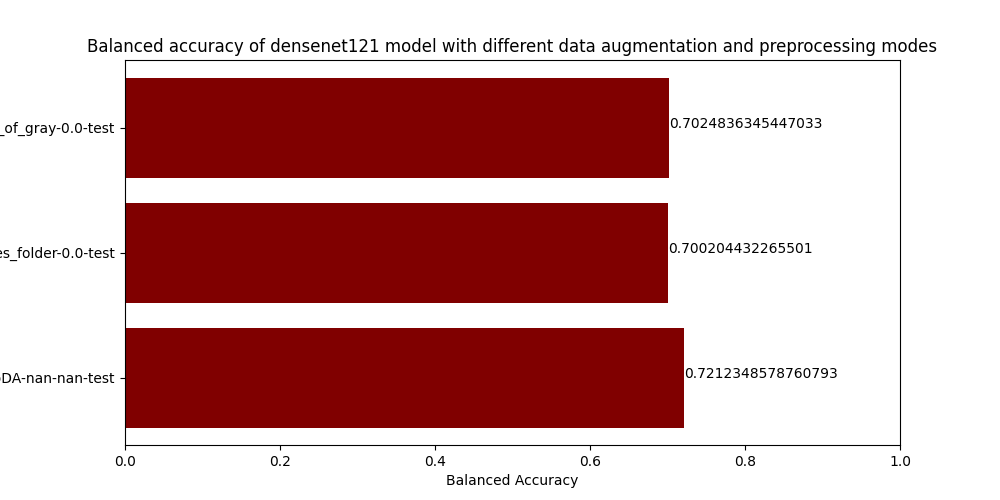

efficientnet_b0 DA2.0-cropped_images_folder-0.0-test 0.7343228724908114


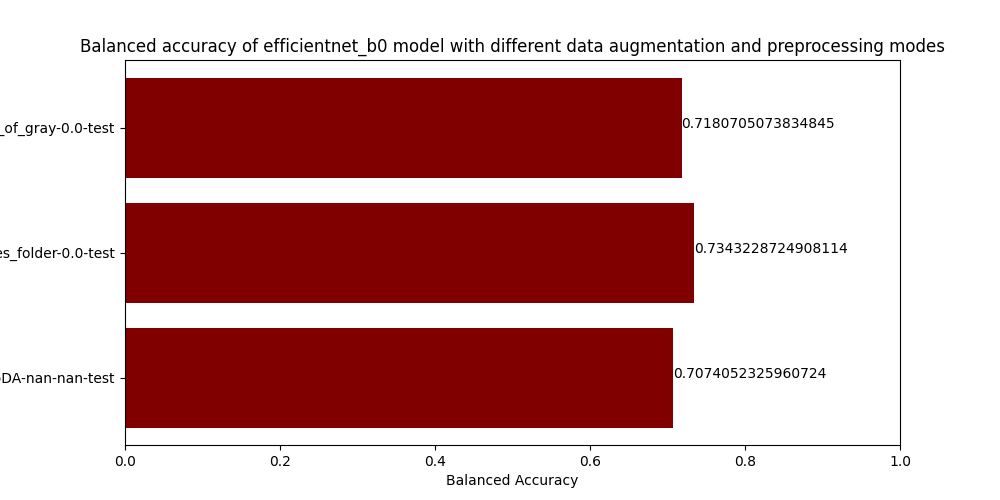

efficientnet_b1 DA2-cropped_images_folder-shades_of_gray-0.0-test 0.7194036667319109


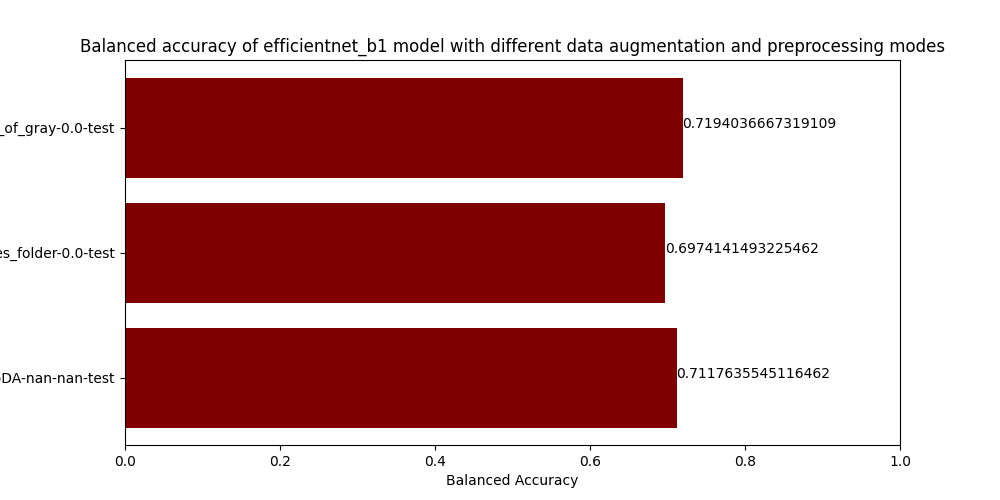

efficientnet_b2 DA2.0-cropped_images_folder-0.0-test 0.744046453970118


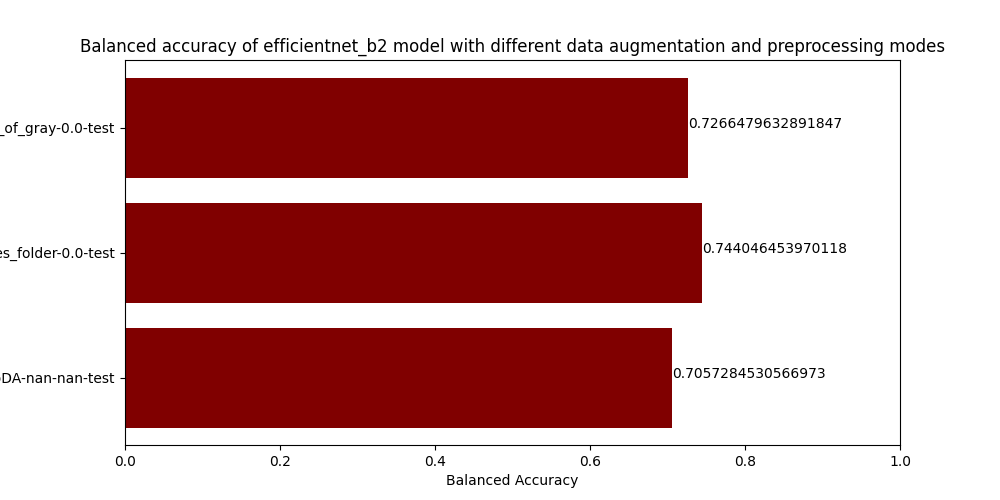

efficientnet_b3 DA2.0-cropped_images_folder-0.0-test 0.7634261977773429


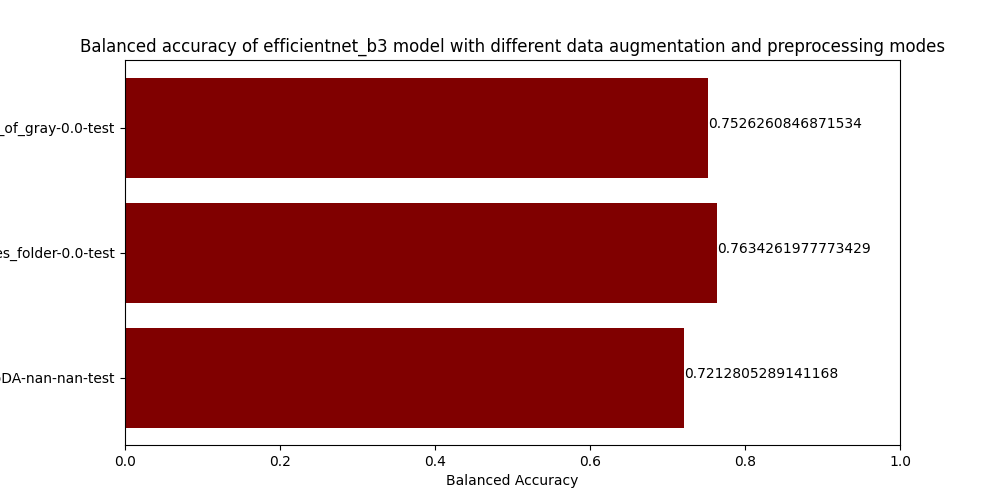

efficientnet_b4 DA2.0-cropped_images_folder-0.0-test 0.7457819534155412


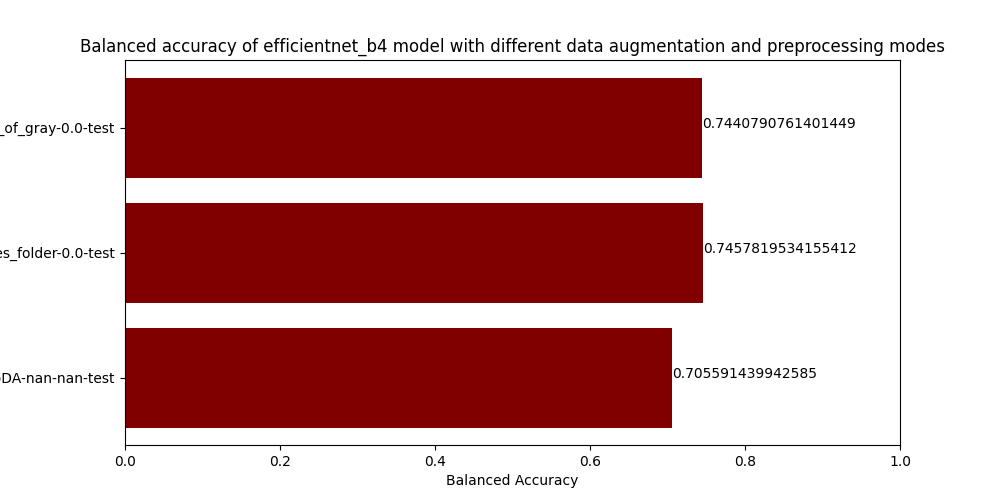

efficientnet_b5 noDA-nan-nan-test 0.5355755638198386


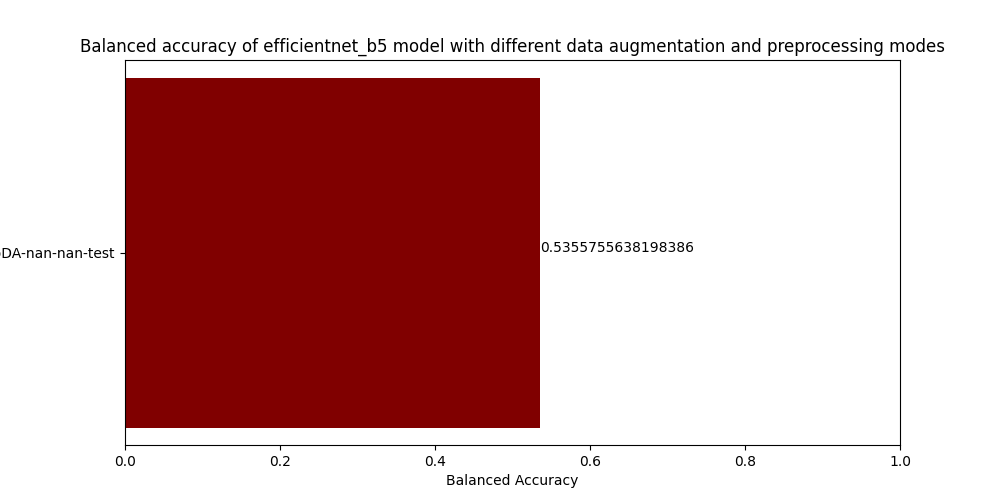

efficientnet_b6 noDA-nan-nan-test 0.523059524586242


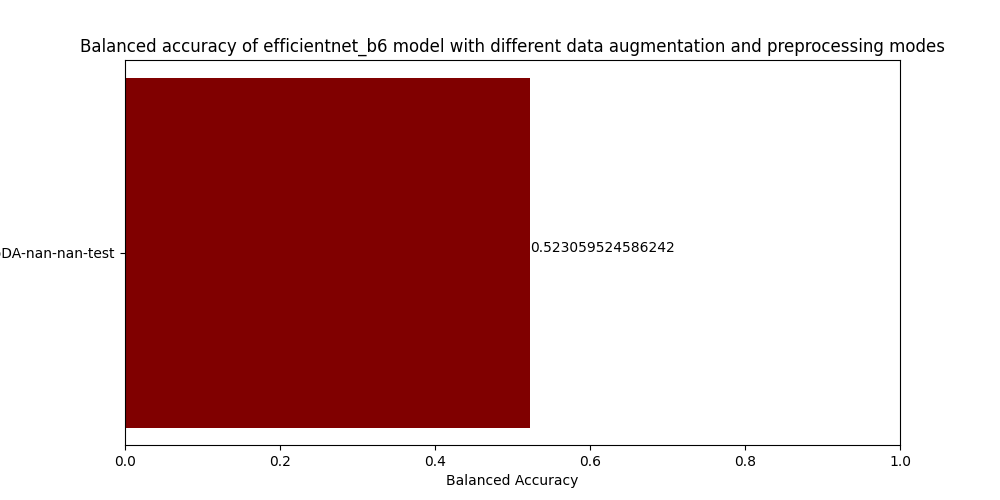

pnasnet5large DA2.0-cropped_images_folder-0.0-test 0.7597224940736392


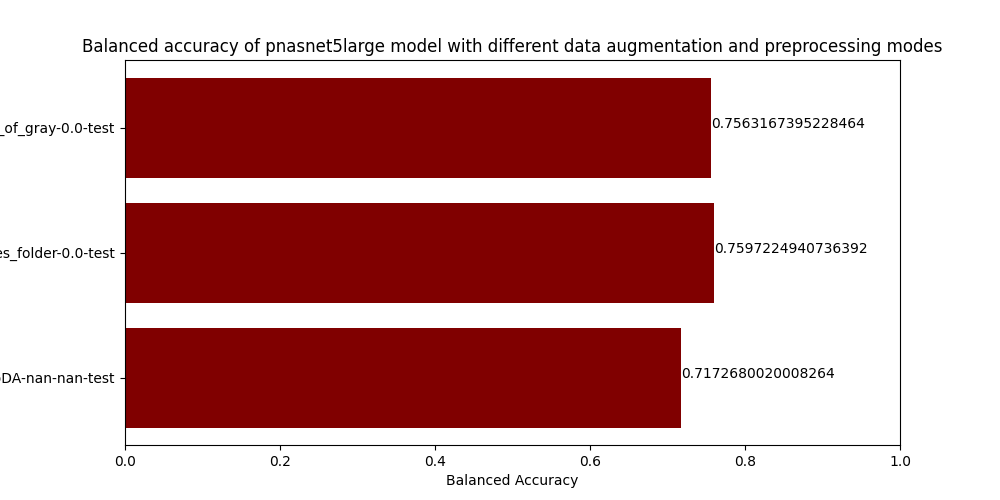

resnest101e DA2-cropped_images_folder-shades_of_gray-0.0-test 0.7729649202931647


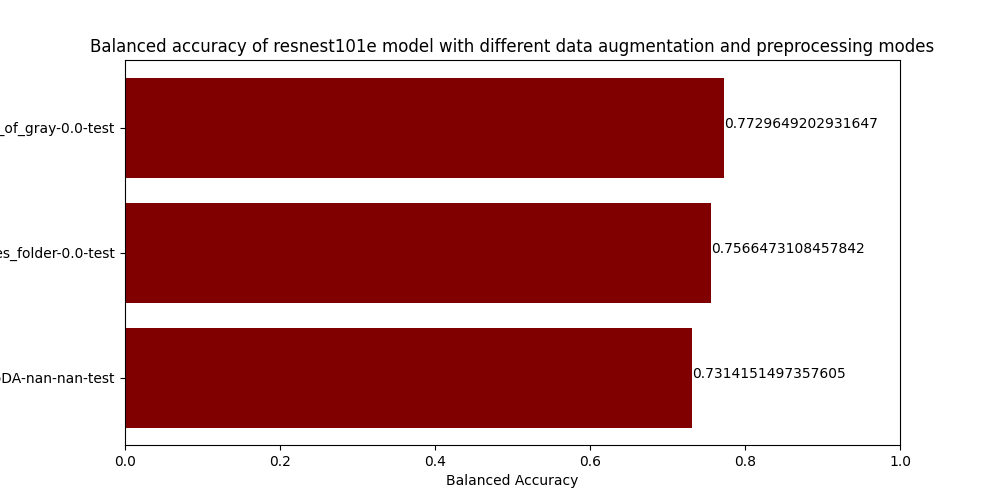

resnext101_32x8d noDA-nan-nan-test 0.7283247428285596


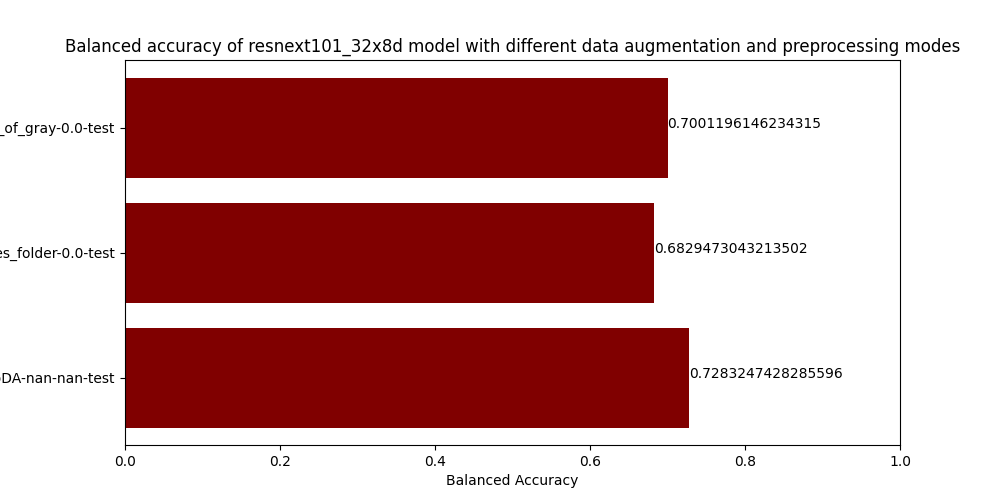

senet154 noDA-nan-nan-test 0.5731171570866227


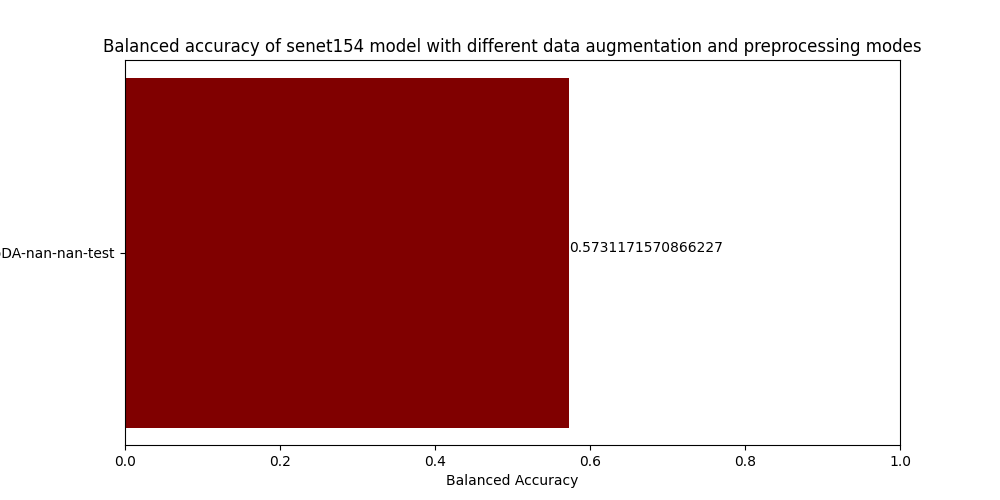

seresnext101_32x8d DA2.0-cropped_images_folder-0.0-test 0.7251277701659381


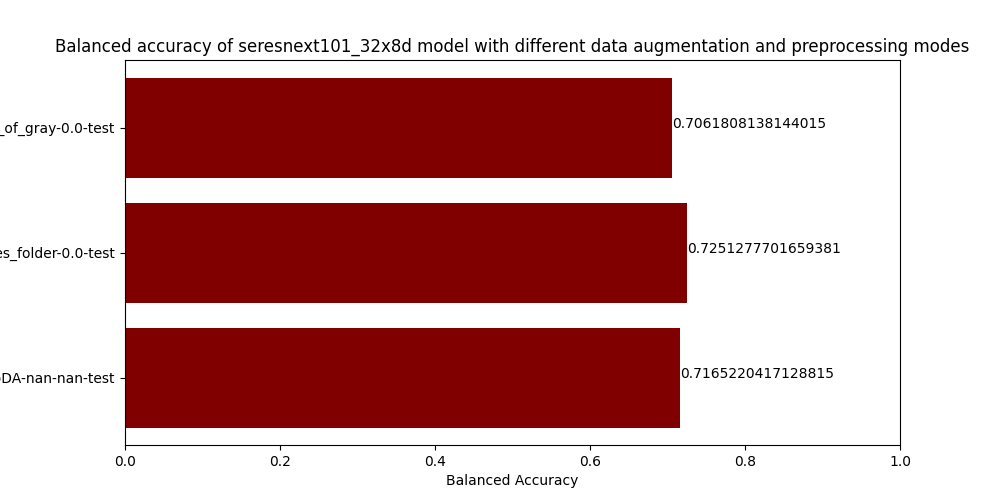

tf_efficientnet_b5 DA2-cropped_images_folder-shades_of_gray-0.0-test 0.7896174506861531


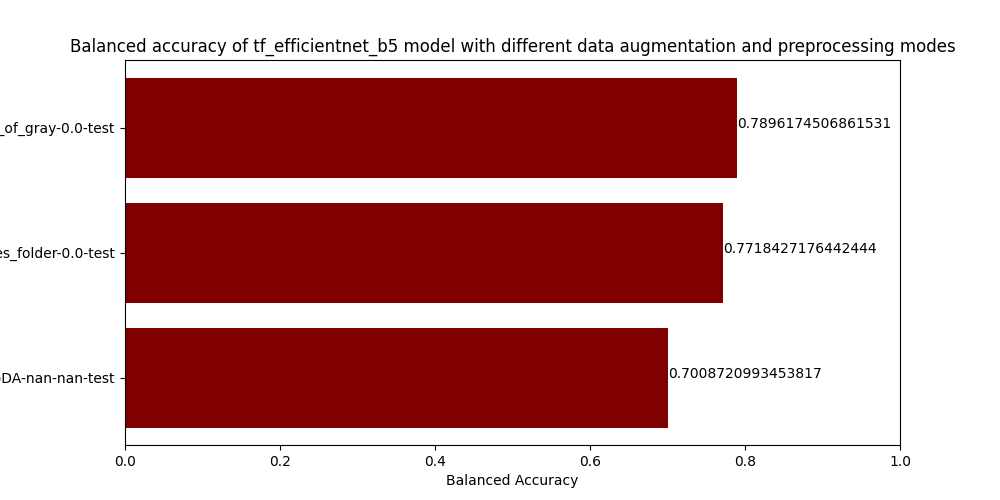

tf_efficientnet_b6 DA2.0-cropped_images_folder-0.0-test 0.7477632065418325


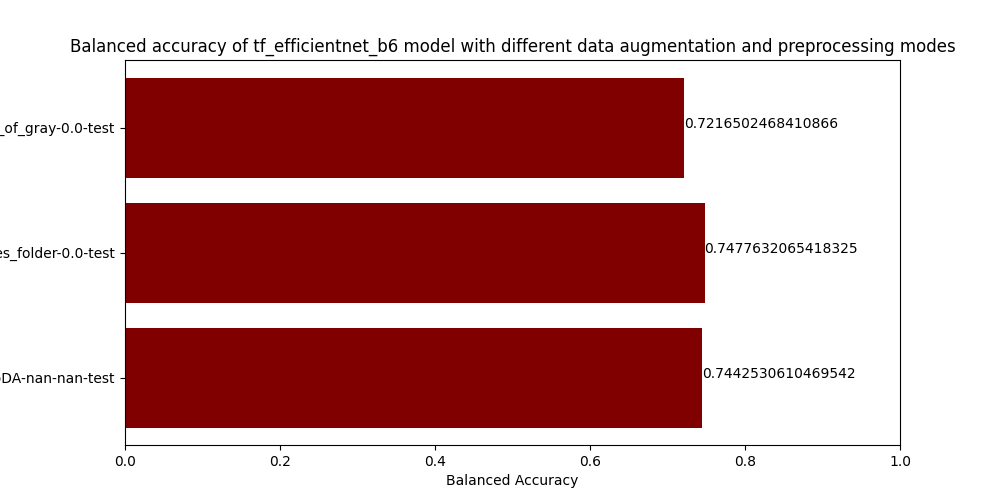

vgg19 DA2.0-cropped_images_folder-0.0-test 0.7142189165089929


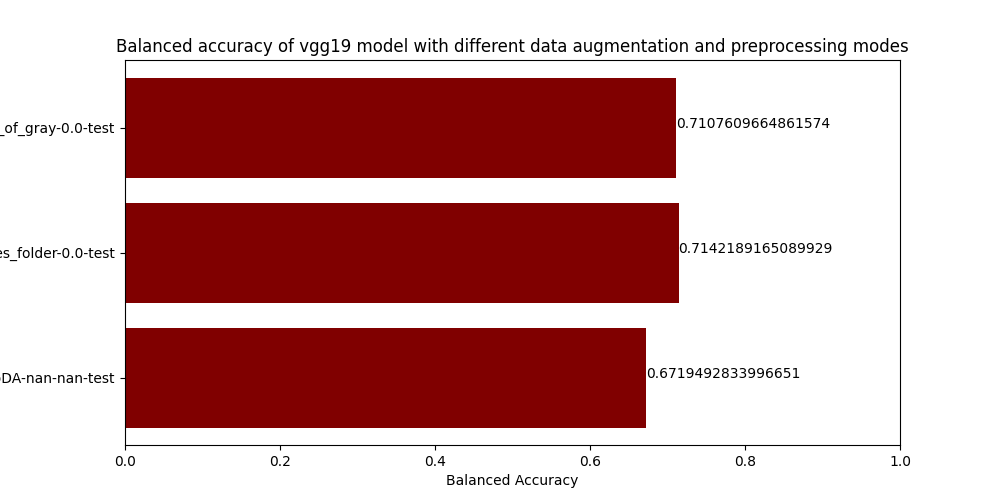

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# labels = df_best_results.groups.keys()


for model_name, group in all_results_grouped:  
    label = model_name
    data = {}

    for i, row in group.iterrows():
        # if row['data_augmentation'] != 'False' and int(row['data_augmentation']) > 1:
        #     continue

        # if row['data_augmentation'] != 'False' or row['PP_crop_mode'] != 'False':
        #     continue

        key = '{}{}{}{}{}{}{}{}{}'.format(('DA' + str(row['data_augmentation']) if str(row['data_augmentation']) != 'False' else 'noDA'), 
                (('-' + row['PP_crop_mode']) if str(row['PP_crop_mode']) != 'False' else ''),
                (('-' + row['PP_enhancement']) if str(row['PP_enhancement']) != 'False' else ''), 
                (('-' + row['PP_hair_removal']) if str(row['PP_hair_removal']) != 'False' else ''), 
                (('-' + row['PP_color_constancy']) if str(row['PP_color_constancy']) != 'False' else ''),
                (('-' + row['PP_denoising']) if str(row['PP_denoising']) != 'False' else ''),
                (('-' + str(row['train_classifier_only'])) if str(row['train_classifier_only']) != 'False' else ''),
                (('-' + str(row['dropout'])) if str(row['dropout']) != 'False' else ''),
                (('-' + str(row['partition'])) if str(row['partition']) != 'False' else ''))
        
        # if key != 'noDA':
        key = key if key != 'noDA' else 'noDA_noPP'
        key = key if key not in data.keys() else key + '2'
        data[key] = row['balanced_accuracy']

    modes = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.barh(modes, values, color ='maroon')
    
    plt.ylabel("modes")
    plt.xlabel("Balanced Accuracy")
    plt.xlim(0, 1)
    # display values on top of bars
    for index, value in enumerate(values):
        plt.text(value, index, str(value))
    plt.title("Balanced accuracy of " + label + " model with different data augmentation and preprocessing modes")

    # print best mode and value
    print(label, max(data, key=data.get), max(data.values()))

    plt.show()
    plt.subplots_adjust(left=0.4, right=1, top=0.9, bottom=0.1)


In [ ]:
df_best_results_noDA_noPP = pd.read_csv('results/best_results_noDA_noPP.csv')

for folder in df_best_results_noDA_noPP['folder']:
    print(folder)

In [ ]:
import os

df_best_results_DA0123_noPP = pd.read_csv('results/results_DA0123_noPP.csv')
folders = [folder.split('/')[1] for folder in df_best_results_DA0123_noPP['folder']]

for folder in folders:
    print(folder)

# path_main_folder = 'results/best_results/DA0123_noPP'
# os.mkdir(path_main_folder)

# for folder in folders:
#     path = os.path.join(path_main_folder, folder)
#     os.mkdir(path)

# find folder in results folder
for folder in folders:
    os.chdir('results')
    for root, dirs, files in os.walk('.', topdown=False):
        

In [ ]:
df_best_results_DA0123_noPP = pd.read_csv('results/results_DA_PPcropped.csv')
folders = [folder.split('/')[1] for folder in df_best_results_DA0123_noPP['folder']]

path_main_folder = 'results/best_results/DA_PPcropped'
# os.mkdir(path_main_folder)

for folder in folders:
    # path = os.path.join(path_main_folder, folder)
    # os.mkdir(path)

    print(folder)

In [ ]:
df_best_results_DA0123_noPP = pd.read_csv('results/results_noDA_PPcropped.csv')
folders = [folder.split('/')[1] for folder in df_best_results_DA0123_noPP['folder']]

path_main_folder = 'results/best_results/noDA_PPcropped'
# os.mkdir(path_main_folder)

for folder in folders:
    # path = os.path.join(path_main_folder, folder)
    # os.mkdir(path)
    print(folder)

In [ ]:
df_best_results_DA0123_noPP = pd.read_csv('results/best_results_noDA_noPP.csv')
folders = [folder.split('/')[1] for folder in df_best_results_DA0123_noPP['folder']]

path_main_folder = 'results/best_results/noDA_noPP'
os.mkdir(path_main_folder)

for folder in folders:
    path = os.path.join(path_main_folder, folder)
    os.mkdir(path)

In [ ]:
columns = ['model_name', 'optimizer', 'batch_size', 'lr_init', 'partition', 'data_augmentation', 'PP_enhancement', 'PP_hair_removal', 'PP_color_constancy', 'PP_denoising', 'PP_crop_mode',  'balanced_accuracy']

df_all_metrics = pd.read_csv('results/all_metrics.csv').fillna(False).replace(['false', False], 'False')[columns]

df_all_metrics = df_all_metrics[(df_all_metrics['partition'] == 'test') && ]

In [2]:
import timm
avail_pretrained_models = timm.list_models(pretrained=True)
len(avail_pretrained_models), avail_pretrained_models

(770,
 ['adv_inception_v3',
  'bat_resnext26ts',
  'beit_base_patch16_224',
  'beit_base_patch16_224_in22k',
  'beit_base_patch16_384',
  'beit_large_patch16_224',
  'beit_large_patch16_224_in22k',
  'beit_large_patch16_384',
  'beit_large_patch16_512',
  'beitv2_base_patch16_224',
  'beitv2_base_patch16_224_in22k',
  'beitv2_large_patch16_224',
  'beitv2_large_patch16_224_in22k',
  'botnet26t_256',
  'cait_m36_384',
  'cait_m48_448',
  'cait_s24_224',
  'cait_s24_384',
  'cait_s36_384',
  'cait_xs24_384',
  'cait_xxs24_224',
  'cait_xxs24_384',
  'cait_xxs36_224',
  'cait_xxs36_384',
  'coat_lite_mini',
  'coat_lite_small',
  'coat_lite_tiny',
  'coat_mini',
  'coat_tiny',
  'coatnet_0_rw_224',
  'coatnet_1_rw_224',
  'coatnet_bn_0_rw_224',
  'coatnet_nano_rw_224',
  'coatnet_rmlp_1_rw_224',
  'coatnet_rmlp_2_rw_224',
  'coatnet_rmlp_nano_rw_224',
  'coatnext_nano_rw_224',
  'convit_base',
  'convit_small',
  'convit_tiny',
  'convmixer_768_32',
  'convmixer_1024_20_ks9_p14',
  'convm

In [26]:
import pandas as pd

all_metrics = pd.read_csv('results/all_metrics.csv')

# removed = all_metrics.drop_duplicates(['model_name', 'optimizer', 'batch_size', 'lr_init', 'partition', 'data_augmentation', 'PP_enhancement', 'PP_hair_removal', 'PP_color_constancy', 'PP_denoising', 'PP_crop_mode'], keep='last')

print(all_metrics.shape)

(384, 40)


In [30]:
import timm
import torch.nn as nn

# create model with dropout
model = timm.create_model('resnet18', pretrained=True, num_classes=2)
model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(512, 2)
)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/a52550/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


Linear(in_features=512, out_features=2, bias=True)

In [11]:
import pandas as pd

df_best_results_noDA_noPP = pd.read_csv('results/best_results_noDA_noPP_2.csv')
df_best_results_noDA_noPP['train'] = 'train1'
df_all_metrics = pd.read_csv('results/all_metrics.csv')
df_all_metrics['train'] = 'train2'
df_concat = pd.concat([df_best_results_noDA_noPP, df_all_metrics], ignore_index=True)
df_concat[df_concat['partition'] == 'test'][['model_name', 'train', 'balanced_accuracy']].sort_values(by = ['model_name', 'balanced_accuracy'], ascending=False)

,model_name,train,balanced_accuracy
47,vgg19,train2,0.692221
11,vgg19,train1,0.671949
8,tf_efficientnet_b6,train1,0.744253
20,tf_efficientnet_b6,train2,0.687436
6,tf_efficientnet_b5,train1,0.700872
17,tf_efficientnet_b5,train2,0.697608
44,seresnext101_32x8d,train2,0.731045
10,seresnext101_32x8d,train1,0.716522
12,senet154,train1,0.573117
14,resnext101_32x8d,train1,0.728325


In [4]:
import timm
from torchinfo import summary
import torch.nn as nn

model_name = 'resnest50d'

model = timm.create_model(model_name, pretrained=True)

for param in model.parameters():
    param.requires_grad = False

num_classes = 10
dropout_prob = 0.5

if 'efficientnet' in model_name or 'densenet121' in model_name:
    model.classifier = nn.Sequential(
        nn.Dropout(dropout_prob),
        nn.Linear(model.classifier.in_features, num_classes)
    )

elif 'resnest101e' in model_name or 'seresnext101_32x8d' in model_name or 'resnext101_32x8d' in model_name or 'resnest50d' in model_name:
    model.fc = nn.Sequential(
        nn.Dropout(dropout_prob),
        nn.Linear(model.fc.in_features, num_classes)
    )

elif 'vgg19' in model_name:
    model.head.fc = nn.Sequential(
        nn.Dropout(dropout_prob),
        nn.Linear(model.head.fc.in_features, num_classes)
    )

elif 'pnasnet5large' in model_name:
    model.last_linear = nn.Sequential(
        # nn.Dropout(dropout_prob),
        nn.Linear(model.last_linear.in_features, num_classes)
    )




summary(model, input_size=(1, 3, 224, 224), verbose=0, col_names=['input_size', 'output_size', 'num_params', 'kernel_size', 'mult_adds', 'trainable'], 
        row_settings=["var_names"])




Layer (type (var_name))                       Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds                 Trainable
ResNet (ResNet)                               [1, 3, 224, 224]          [1, 10]                   --                        --                        --                        Partial
├─Sequential (conv1)                          [1, 3, 224, 224]          [1, 64, 112, 112]         --                        --                        --                        False
│    └─Conv2d (0)                             [1, 3, 224, 224]          [1, 32, 112, 112]         (864)                     [3, 3]                    10,838,016                False
│    └─BatchNorm2d (1)                        [1, 32, 112, 112]         [1, 32, 112, 112]         (64)                      --                        64                        False
│    └─ReLU (2)                               [1, 32, 112, 112]         [1, 32, 112,

In [5]:
model_name = 'seresnext101_32x8d'

model = timm.create_model(model_name, pretrained=True)

summary(model, input_size=(1, 3, 224, 224), verbose=0, col_names=['input_size', 'output_size', 'num_params', 'kernel_size', 'mult_adds', 'trainable'], 
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds                 Trainable
ResNet (ResNet)                          [1, 3, 224, 224]          [1, 1000]                 --                        --                        --                        True
├─Conv2d (conv1)                         [1, 3, 224, 224]          [1, 64, 112, 112]         9,408                     [7, 7]                    118,013,952               True
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]         [1, 64, 112, 112]         128                       --                        128                       True
├─ReLU (act1)                            [1, 64, 112, 112]         [1, 64, 112, 112]         --                        --                        --                        --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]         [1, 64, 56, 56]           --                      